In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report


# Membaca dataset dari file yang diunggah
file_path = 'Buffalo_Dataset.csv'
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk melihat struktur data
data.head(20)


Buffalo_Name  Berat_Badan  Panjang_Badan  Panjang_Tanduk
0   African Buffalo       724.84         277.99           93.25
1   African Buffalo       693.09         268.49           98.55
2   African Buffalo       732.38         251.19           92.08
3   African Buffalo       776.15         237.06           96.92
4   African Buffalo       688.29         263.96           81.06
5   African Buffalo       688.29         257.87          102.13
6   African Buffalo       778.96         267.90          100.01
7   African Buffalo       738.37         262.70           91.83
8   African Buffalo       676.53         270.99          106.59
9   African Buffalo       727.13         239.30          109.38
10  African Buffalo       676.83         276.35           83.92
11  African Buffalo       676.71         253.95           92.37
12  African Buffalo       712.10         291.51           92.31
13  African Buffalo       604.34         236.22           90.60
14  African Buffalo       613.75         284.72          108.29
15  African Buffalo       671.89         253.96           98.06
16  African Buffalo       649.36         236.97           97.35
17  African Buffalo       715.71         240.32           79.96
18  African Buffalo       654.60         243.59          106.35
19  African Buffalo       629.38         258.48           87.61

In [2]:

# Memisahkan fitur dan label
X = data[['Berat_Badan','Panjang_Badan','Panjang_Tanduk' ]]
y = data['Buffalo_Name']

# Mengonversi label menjadi format numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi data pelatihan (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=600 / len(X), random_state=69)

# Normalisasi fitur untuk memastikan distribusi seragam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menampilkan informasi dasar tentang data
X_train_scaled.shape, X_test_scaled.shape, set(y_encoded)

# Menampilkan hasil normalisasi sebanyak 20 data
pd.DataFrame(X_train_scaled, columns=['Berat_Badan', 'Panjang_Badan', 'Panjang_Tanduk']).head(20)


Berat_Badan  Panjang_Badan  Panjang_Tanduk
0     -1.058698      -1.233671       -0.929948
1      1.033676      -0.081749        1.059647
2     -1.013726       0.097562       -0.549455
3      1.088429       1.591597        1.267396
4     -0.799379      -1.209720       -1.153297
5      0.886513       1.134259        1.437096
6     -0.766564      -1.100321       -0.852327
7      1.011922       0.855908        1.064594
8      0.535788       1.675750        0.835918
9     -1.056687      -0.343593       -0.847762
10     0.361842       1.393838        0.598491
11     0.401513       0.799266        1.657021
12    -1.352842      -1.375760       -1.357241
13     0.539170       0.537098        0.894514
14     1.044554       0.092707        0.844289
15     1.079471       0.358111        1.359095
16     1.303233       0.454887        0.851518
17    -0.878902      -0.987038       -0.703174
18     0.925909       1.391572        0.342039
19     0.674542       1.609722        1.162000

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# Model tanpa BatchNormalization dan Dropout
model = Sequential([
    Dense(36, activation='relu', name='Hidden_layer_1', input_dim=X_train.shape[1]),
    Dense(24, activation='relu', name='Hidden_layer_2'),
    Dense(len(label_encoder.classes_), activation='sigmoid', name='Output_layer')  # Output layer
])

# Optimizer
optimizer = Adam(learning_rate=0.0001)

# Kompilasi model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Membuat Callback agar bisa melihat Weight setiap epoch
class WeightLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1} Weights:")
        for layer in self.model.layers:
            if hasattr(layer, 'weights') and len(layer.weights) > 0:
                weights, biases = layer.get_weights()
                print(f"Layer: {layer.name}")
                print(f"Weights:\n{weights}")
                print(f"Biases:\n{biases}\n")

# Melatih model
history = model.fit(
    X_train_scaled,
    tf.keras.utils.to_categorical(
        y_train.map(lambda x: label_encoder.transform([x])[0])
    ),  # Mengubah label menjadi numerik sebelum one-hot encoding
    epochs=50,
    batch_size=32,
    callbacks=[WeightLogger()],
    validation_split=0.2
)


c:\Users\rizal\anaconda3\envs\tf_win\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 0.6336   
Epoch 1 Weights:
Layer: Hidden_layer_1
Weights:
[[ 0.0360577  -0.28504258 -0.03214311  0.07239863  0.08760095  0.31448323
  -0.25089625 -0.26108798  0.3807515   0.02049106 -0.13602753 -0.1481887
  -0.2687185  -0.24818847  0.00292178  0.2937393   0.07587828  0.3083926
  -0.3431591  -0.20467353 -0.10530955 -0.3331505   0.15341206 -0.34979355
  -0.34130275  0.05468097 -0.10098526 -0.32086733 -0.39018297 -0.30319172
  -0.10802406  0.01974892 -0.38001457  0.17186934  0.3841199  -0.15149929]
 [ 0.2784955  -0.3490071   0.05800056 -0.00706649  0.07539722  0.19686213
  -0.3269563  -0.01855595  0.007935    0.12532309 -0.17280196  0.01467484
  -0.03152584  0.07778919 -0.29404896 -0.20452407 -0.22906056 -0.04437923
  -0.01326132  0.04930574 -0.03401314  0.06271517  0.07847062 -0.25562632
  -0.17933352 -0.32088837 -0.2815795  -0.34761518 -0.21994185  0.18351829
  -0.30005324  0.2732942  -0.02362409 -0.17086163 -0

In [4]:
# menampilkan hasil evaluasi
loss, accuracy = model.evaluate(X_test_scaled, tf.keras.utils.to_categorical(y_test.map(lambda x: label_encoder.transform([x])[0])), verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.0087
Test Accuracy: 100.00%


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


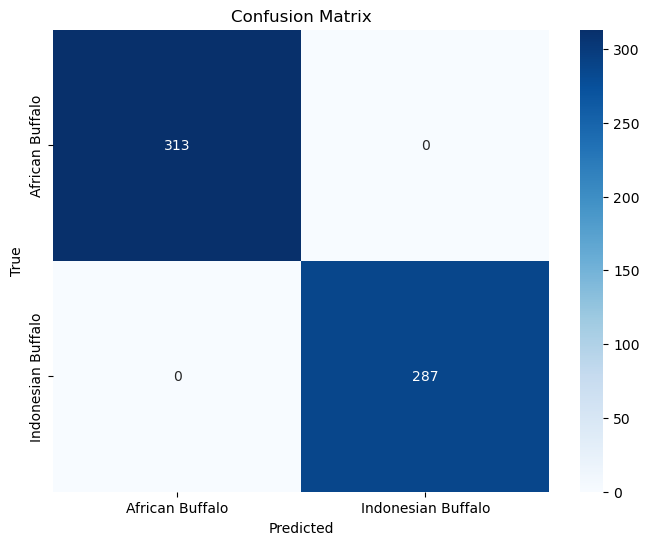

Classification Report:
                     precision    recall  f1-score   support

   African Buffalo       1.00      1.00      1.00       313
Indonesian Buffalo       1.00      1.00      1.00       287

          accuracy                           1.00       600
         macro avg       1.00      1.00      1.00       600
      weighted avg       1.00      1.00      1.00       600



In [5]:
# Gabungkan semua label untuk melatih encoder
all_labels = np.concatenate([y_train, y_test])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Encode label untuk y_test jika belum dalam bentuk numerik
if isinstance(y_test[0], str):  # Jika y_test masih berupa string
    y_test_encoded = label_encoder.transform(y_test)
else:  # Jika y_test sudah berupa numerik
    y_test_encoded = y_test

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)  # Gunakan data yang telah diskalakan
y_pred_classes = np.argmax(y_pred, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Konversi prediksi numerik ke label string
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Gunakan label string untuk y_test_encoded juga
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Hitung confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

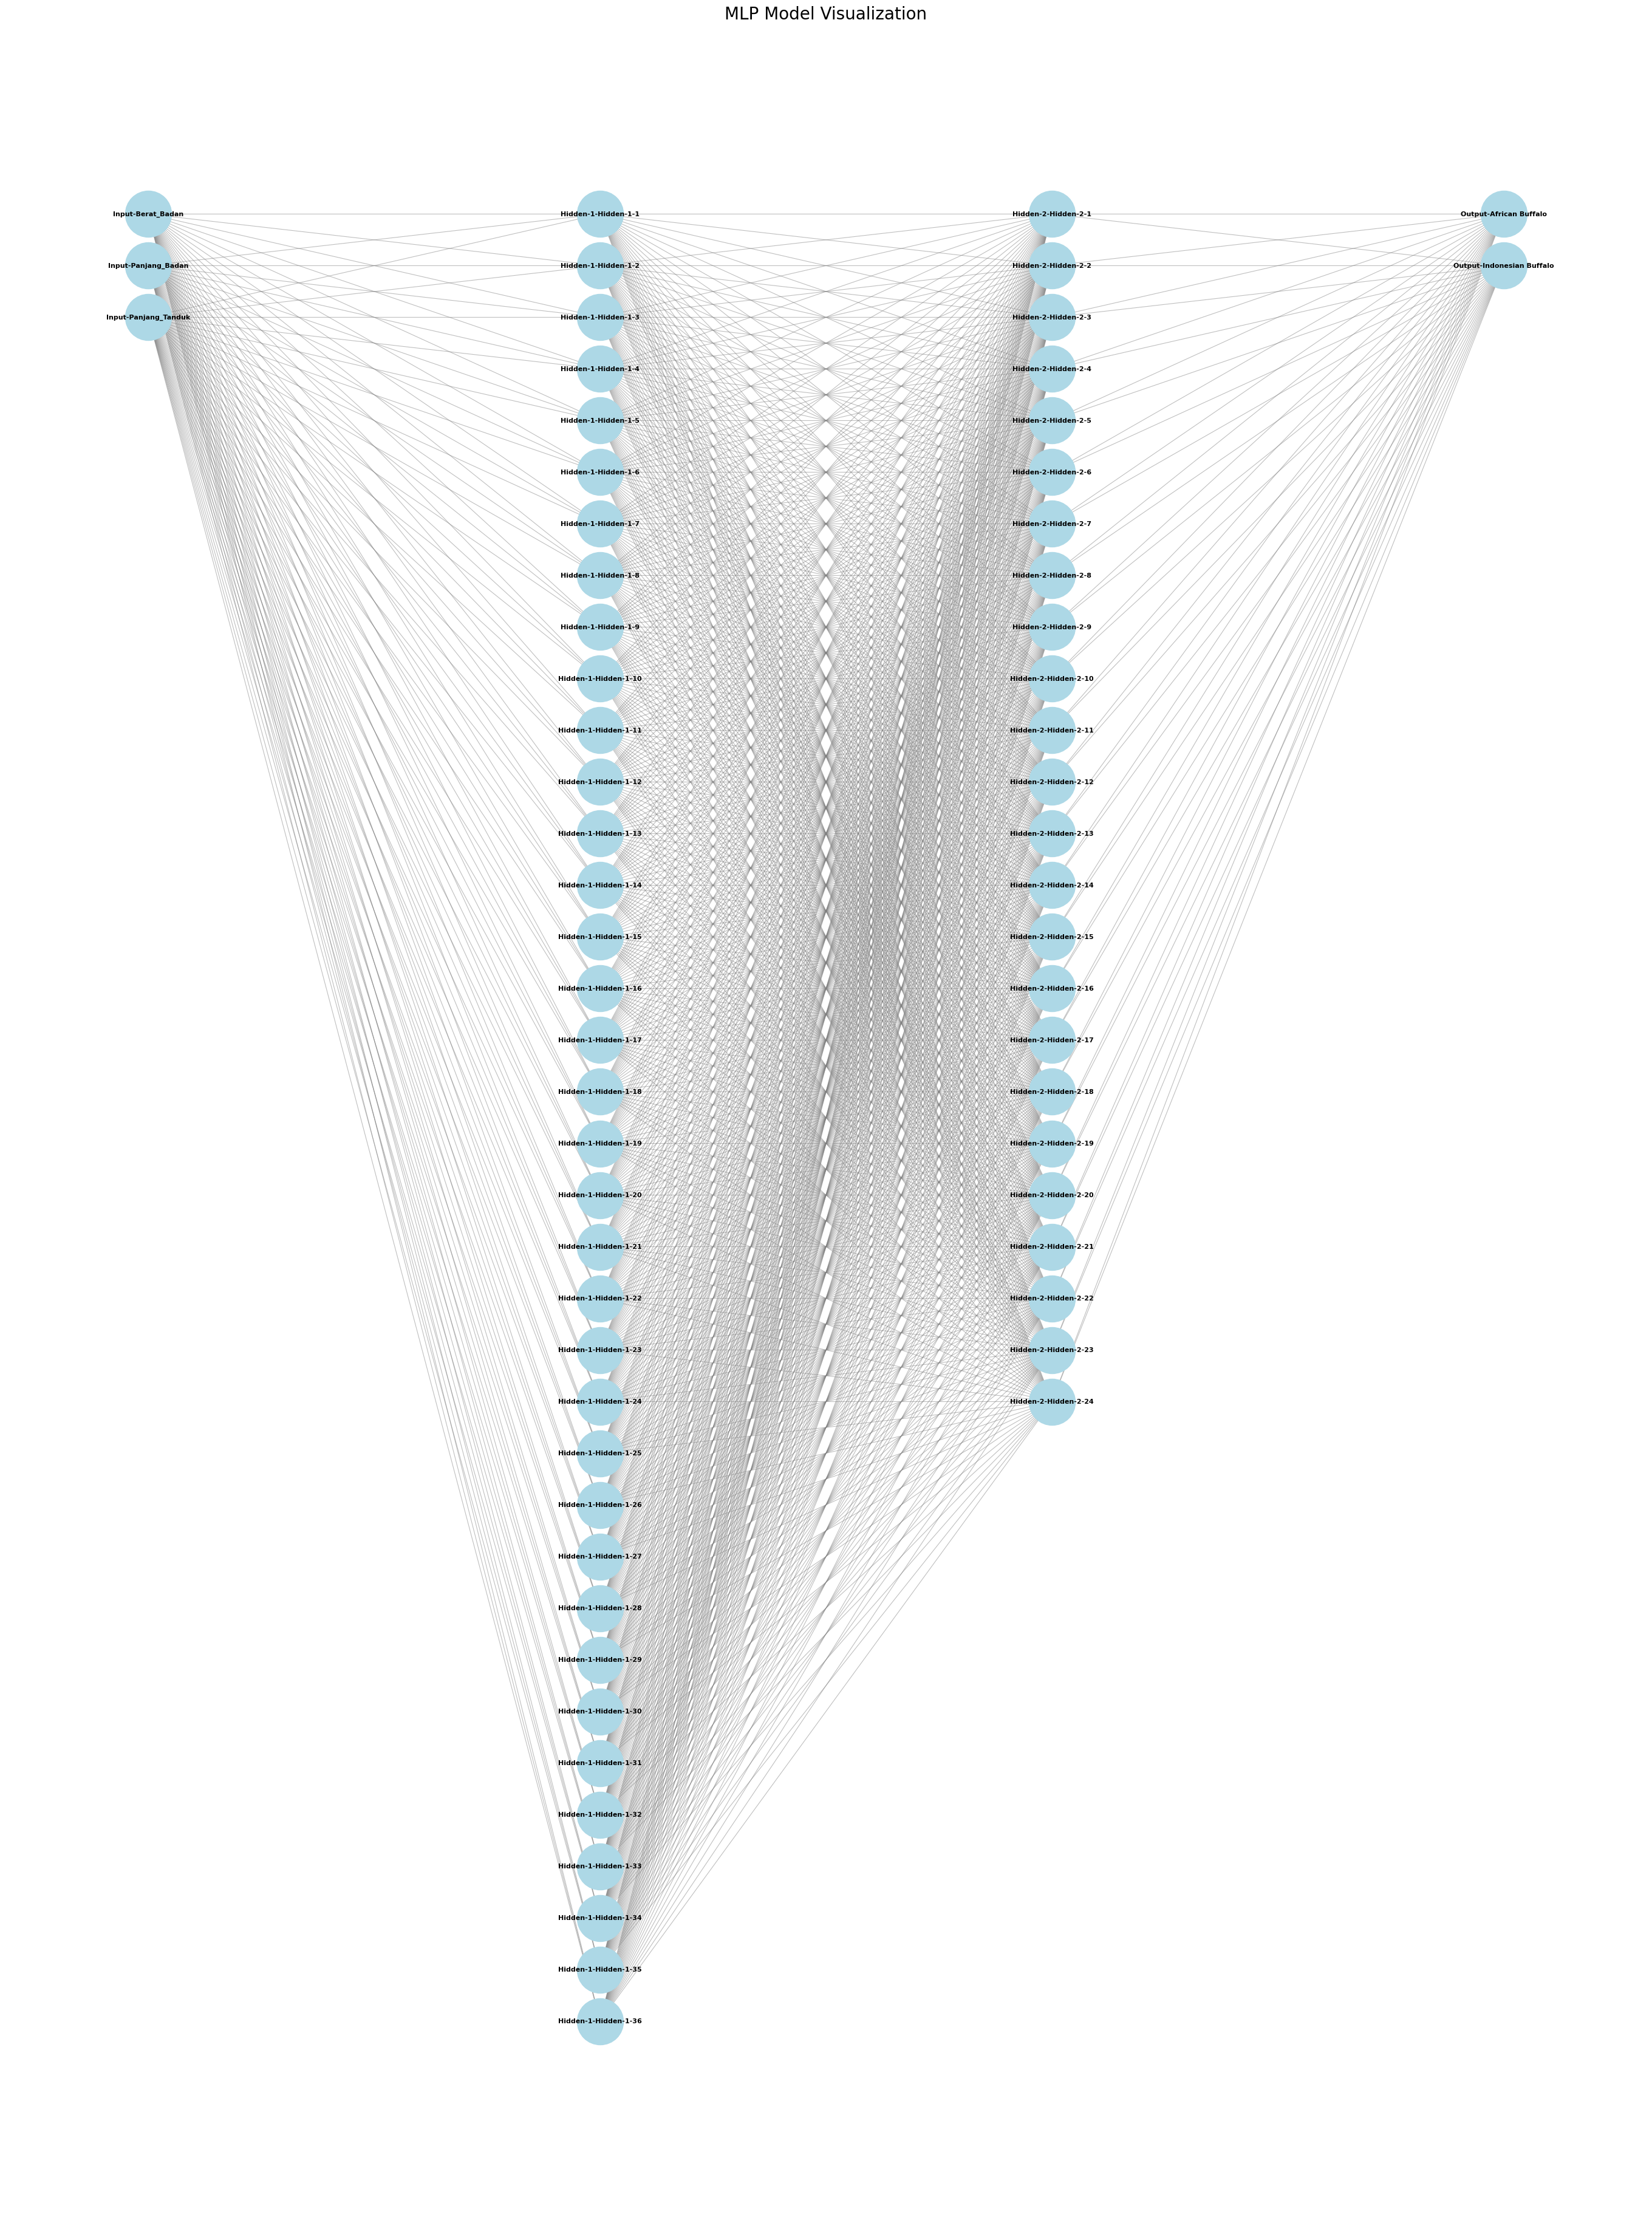

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Menentukan lapisan dan neuron
layers = {
    "Input": [
        "Berat_Badan", "Panjang_Badan", "Panjang_Tanduk"
    ],
    "Hidden-1": [f"Hidden-1-{i}" for i in range(1, 37)],
    "Hidden-2": [f"Hidden-2-{i}" for i in range(1, 25)],
    "Output": ["African Buffalo", "Indonesian Buffalo"]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph for each layer
positions = {}
x_offset = 0
vertical_spacing = 2  # Adjusted vertical spacing
horizontal_spacing = 4  # Adjusted horizontal spacing

for layer_name, neurons in layers.items():
    for i, neuron in enumerate(neurons):
        node_name = f"{layer_name}-{neuron}"
        G.add_node(node_name, layer=layer_name)
        # Increase vertical spacing between neurons
        positions[node_name] = (x_offset, -i * vertical_spacing)
    x_offset += horizontal_spacing  # Increase horizontal spacing between layers

# Add edges between consecutive layers
layer_names = list(layers.keys())
for i in range(len(layer_names) - 1):
    current_layer = layer_names[i]
    next_layer = layer_names[i + 1]
    for neuron_a in layers[current_layer]:
        for neuron_b in layers[next_layer]:
            G.add_edge(f"{current_layer}-{neuron_a}", f"{next_layer}-{neuron_b}")

# Draw the graph
plt.figure(figsize=(30, 40))  # Larger figure size for better visibility
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Prevent automatic scaling
nx.draw_networkx_nodes(
    G,
    pos=positions,
    node_color="lightblue",
    node_size=3000  # Larger node size for clarity
)
nx.draw_networkx_labels(
    G,
    pos=positions,
    font_size=8,
    font_weight="bold"
)
nx.draw_networkx_edges(
    G,
    pos=positions,
    edge_color="gray",  # Light gray for less intrusive connections
    alpha=0.5,  # Semi-transparent edges
    width=0.8  # Slightly thicker edges for visibility
)

# Add title and hide axes
plt.title("MLP Model Visualization", fontsize=20)
plt.axis("off")
plt.show()